# Estimation de paramètres

## Voir
* https://youtu.be/5NMxiOGL39M?si=sKC64R1psv71ZthO
* Chap 19 Bayesian Stat Fun Way
* https://towardsdatascience.com/probability-concepts-explained-bayesian-inference-for-parameter-estimation-90e8930e5348


# Justification

* Mesures : 13.9, 17.5, 14.1

* On peut calculer
  * Moyenne = 15.17
  * Std dev = Ecart type = sqrt((13.9-15.2)^2 +... ) = 2.02 
  * Std Err = Std Dev / sqrt(n) = 2.02/sqrt(3) = 1.17
   

In [81]:
# preampbule
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm   
from scipy.stats import uniform   
import  math

In [82]:
values = np.array([13.9, 17.5, 14.1])
mean = values.mean()
stdev = values.std(ddof=1) # ! ddof=1 car on est sur un échantillon, pas une population => division par n-1
stderr = stdev / np.sqrt(np.size(values)) 
print(f" Mean    = {mean:.2f}\n Std     = {stdev:.2f}\n Std Err = {stderr:.2f}")
print(f" CI_95   = [{mean-2*stderr:.2f}, {mean+2*stderr:.2f}]")

 Mean    = 15.17
 Std     = 2.02
 Std Err = 1.17
 CI_95   = [12.83, 17.50]


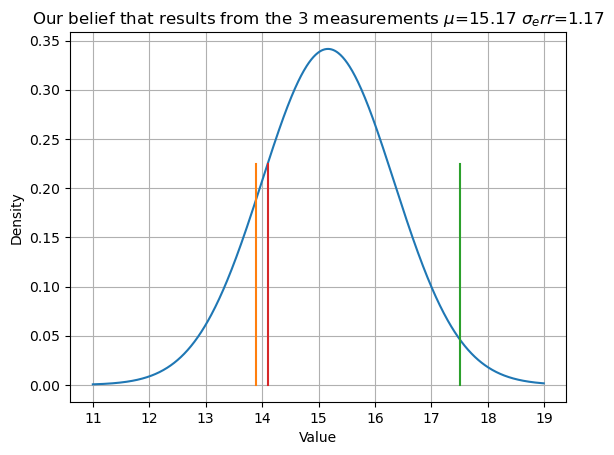

In [83]:
dx = 0.01
x_values = np.arange(11, 19, dx)
y_values = norm.pdf(x_values, mean, stderr)    

# Check
# Faut aller de -inf à +inf pour retrouver 1.0
# Faut pas oublier de multiplier par le "pas" sinon on a pas de largeur "dx" d'intégration
# print(np.sum(y_values)*dx)

fig, ax = plt.subplots()

ax.plot(x_values, y_values)

# Affiche les 3 lignes verticales qui sont nos mesures
for x in values:
  # plt.plot((x, x),(0.0, 0.175), linestyle='dashed', alpha=0.4)
  plt.plot((x, x),(0.0, 0.225))

ax.set_title(f"Our belief that results from the 3 measurements $\mu$=15.17 $\sigma_err$={stderr:.2f}")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.grid()

### Remarques
* Cette courbe c'est notre connaissance à priori qui s'appuie sur 3 mesures de poids dont on a déduit une distribution normale
* La moyenne semble OK car c'est juste la moyenne des mesures
* **MAIS** la gamme des valeurs est très très large
* On est confiant à 95% que la vraie moyenne se trouve entre 12.8 et 17.5 
* Difficile de prendre une décision
* C'est lié au fait que les données de départ sont dispersées
* Normalement on retournerait prendre plus de mesures (il nous faut plus de dents)
* C'est pas toujours possible et c'est le cas, on doit faire avec ce que l'on a

$P(w|m) = \frac{P(m|w) * P(w)}{ P(m)} $
* m = measurement that we took
* w = actual weight
* P(w) = prior = préjugé = c'est ce que l'on pense être son poids AVANT qu'on ne la pèse. Probability distribution du poids.  
* P(m|w) = likelihood = la vraissemblance de l'observation. Probabilité d'observer cette mesure sachant ce poids (w)
* P(w|m) = a posterior = c'est la crédence (le degré de confiance) que l'on a dans son poids APRES avoir effectué les mesures
* P(m) : marginal likelihood. Terme de mise à l'échelle pour que P(w|m) soit bien entre 0 et 1

Process : 
* On démarre avec nos connaissances à priori
* On fait des mesures
* On met à jour nos connaissances

# On détermine nos priors

* $\mu = 14.2$ était son poids la dernière fois
* $\sigma = 0.5$
  * Parce que c'est ce qui est dit sur la page web : https://e2eml.school/how_bayesian_inference_works.html
* std_err = 1 
  * C'est ce qu'il dit dans la video voir 19:47
  * std_err = 1 lb => 1 = sigma/sqrt(3) = > sigma = sqrt(3) = 1.73
  * Du coup je suis perdu

Finalement je pars avec std_err = 1


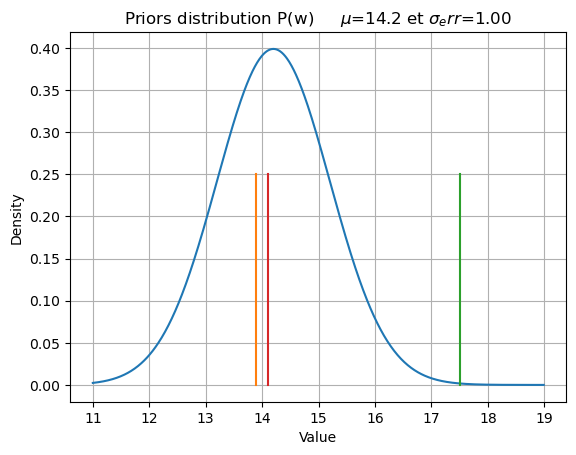

In [84]:
priors_mean = 14.2
priors_std_err = 1
priors = norm.pdf(x_values, priors_mean, priors_std_err)     

fig, ax = plt.subplots()
ax.plot(x_values, priors)

for x in values:
  plt.plot((x, x),(0.0, 0.25))

ax.set_title(f"Priors distribution P(w)     $\mu$=14.2 et $\sigma_err$={priors_std_err:.2f}")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.grid()

# Déterminer les nouveaux a priori

New mean : 14.13


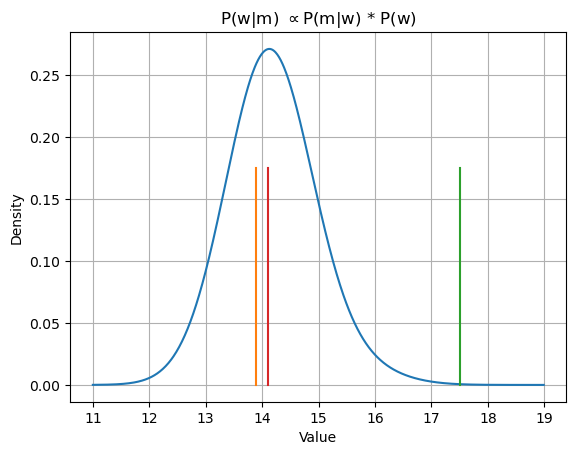

In [85]:
new_priors = []
for x in x_values:
  running_prior = norm.pdf(x=x, loc=14.2, scale=1.0)
  my_val=0
  for v in values:
    my_val = my_val + norm.pdf(x=v, loc=x, scale=stderr) * running_prior    
  new_priors.append(my_val)

fig, ax = plt.subplots()
ax.plot(x_values, new_priors)

for x in values:
  plt.plot((x, x),(0.0, 0.175))

ax.set_title("P(w|m) $\propto$P(m|w) * P(w)")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
# ax.legend()
ax.grid()


# print(np.sum(new_priors))
# print(sum(new_priors))

new_priors = np.array(new_priors)
idx_max = np.argmax(new_priors)
print(f"New mean : {x_values[idx_max]:.2f}")



Mean  : 14.16
Sigma : 0.82


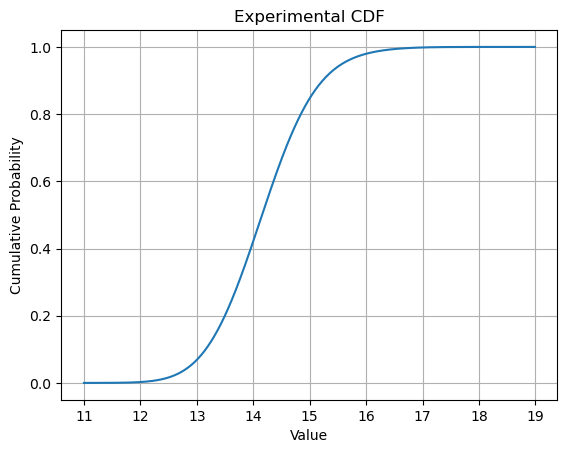

In [86]:
new_priors2 = new_priors.copy()
# normalize 
new_priors2 = new_priors2/new_priors2.sum()
new_priors2= new_priors2.cumsum()

fig, ax = plt.subplots()
ax.plot(x_values, new_priors2)
ax.set_title("Experimental CDF")
ax.set_xlabel("Value")
ax.set_ylabel("Cumulative Probability")
# ax.legend()
ax.grid()

# Find mean and CI_95
idx_mean = np.where((new_priors2>0.498) & (new_priors2<0.502)) 
# print(idx_mean)
xmean = x_values[idx_mean[0][0]]
print(f"Mean  : {xmean:.2f}")

idx_CI95_inf = np.where(new_priors2>0.0249)[0][0] 
idx_CI95_sup = np.where(new_priors2>0.9749)[0][0]

xCI95_inf = x_values[idx_CI95_inf]
xCI95_sup = x_values[idx_CI95_sup]
# print(f"{xCI95_inf:.2f}")
# print(f"{xCI95_sup:.2f}")

print(f"Sigma : {(xCI95_sup-xCI95_inf)/4:.2f}")

# On compare
* La distribution des probabilités suite aux 3 mesures initiales
* La distribution avec notre a priori $\mu=14.2$ et $\sigma=1$  
* La distribution des probabilités quand on tient compte de nos connaissances à priori

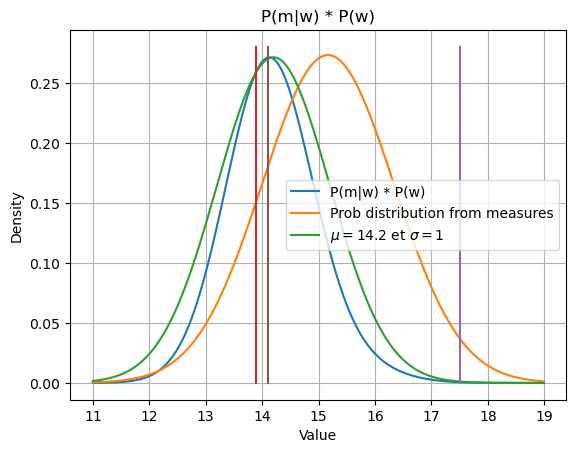

In [98]:
fig, ax = plt.subplots()

ax.plot(x_values, new_priors, label="P(m|w) * P(w)")
# la division par 1.25 est complètement arbitraire c'est juste pour mettre les 2 courbes sur la même échelle
ax.plot(x_values, y_values/1.25, label="Prob distribution from measures")
ax.plot(x_values, priors/1.47, label="$\mu=14.2$ et $\sigma=1$ ")

for x in values:
  plt.plot((x, x),(0.0, 0.28))

ax.set_title("P(m|w) * P(w)")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.legend()
ax.grid()

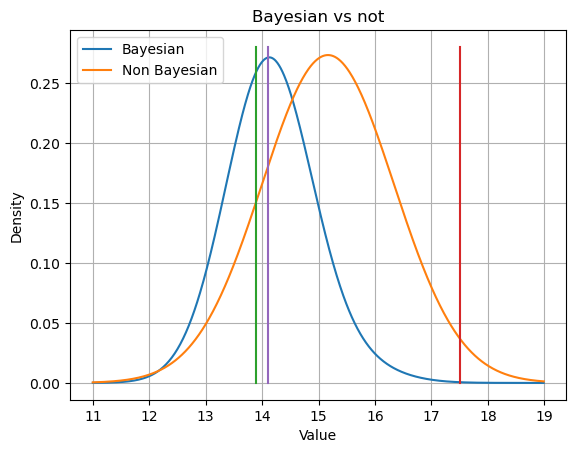

In [100]:
fig, ax = plt.subplots()

ax.plot(x_values, new_priors, label="Bayesian")
ax.plot(x_values, y_values/1.25, label="Non Bayesian")

for x in values:
  plt.plot((x, x),(0.0, 0.28))

ax.set_title("Bayesian vs not")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.legend()
ax.grid()

# On imagine qu'on a pas d'idée du poids
* On dit qu'elle pèse entre 11 et 19 kg
* Faut une distribution donc le poids c'est un truc en 1/dx

1.0


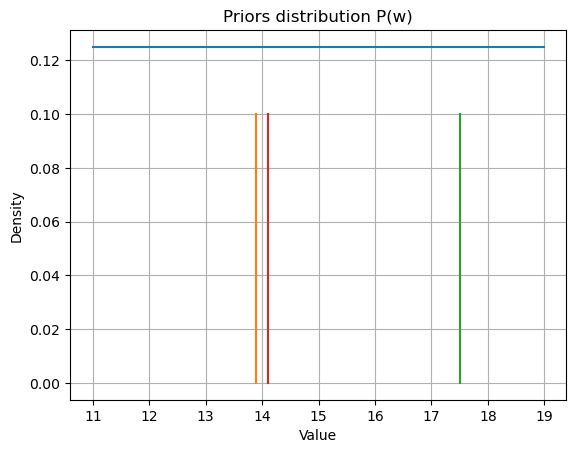

In [78]:
priors = uniform.pdf(x_values, loc=11, scale=8)     
print(np.sum(priors)*dx)

fig, ax = plt.subplots()
ax.plot(x_values, priors)

for x in values:
  plt.plot((x, x),(0.0, 0.1))

ax.set_title(f"Priors distribution P(w)")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.grid()

Most probable value : 14.02


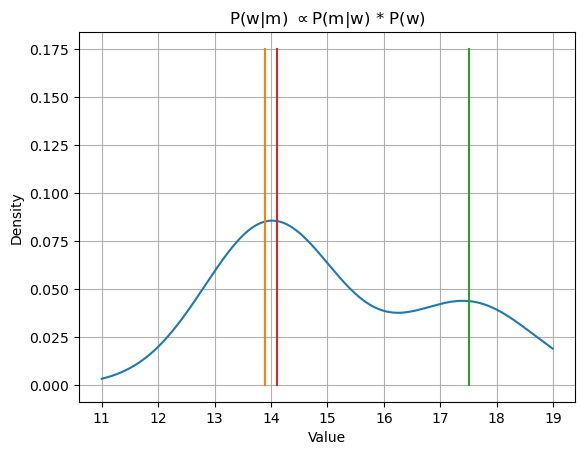

In [79]:

new_priors = []
for x in x_values:
  running_prior = uniform.pdf(x, loc=11, scale=8)     
  my_val=0
  for v in values:
    my_val = my_val + norm.pdf(x=v, loc=x, scale=stderr) * running_prior    
  new_priors.append(my_val)

fig, ax = plt.subplots()
ax.plot(x_values, new_priors)

for x in values:
  plt.plot((x, x),(0.0, 0.175))

ax.set_title("P(w|m) $\propto$P(m|w) * P(w)")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
# ax.legend()
ax.grid()

new_priors = np.array(new_priors)
idx_max = np.argmax(new_priors)
print(f"Most probable value : {x_values[idx_max]:.2f}")


# Début de la vidéo
# La mécanique : Problème des cheveux longs

## Données
* On dit que sur 100 personnes au cinéma
  * 50 femmes
    * 25 cheveux courts
    * 25 cheveux longs
  * 50 hommes
    * 48 cheveux courts
    * 2 cheveux longs

* On dit que sur 100 personnes aux toilettes hommes
  * 2 femmes
    * 1 cheveux courts
    * 1 cheveux longs
  * 98 hommes
    * 94 cheveux courts
    * 4 cheveux longs

## Probabilités
### Cinéma
  * Proba d'être un homme = 50/100 = 0.5   
  * Proba d'être une femme = 50/100 = 0.5   
  * P(long|femme) = P(long ET femme)/ P(femme) = 25/(25+25) = 0.5
  * P(long|homme) = P(long ET homme)/ P(homme) = 2/(48+2) = 0.04

### Toilettes hommes
  * Proba d'etre un homme = 98/100 = 0.98  
  * Proba d'etre une femme = 2/100 = 0.02
  * P(long|femme) = P(long ET femme)/ P(femme) = 1/2 = 0.5
  * P(long|homme) = P(long ET homme)/ P(homme) = 4/(94+4) = 0.04


## Proba conditionnelle
* P(A|B) != P(B|A)
* P(Cute | Puppy) != P(Puppy | Cute)
  * J'ai un truc mignon. Quelle est la probabilité que ce soit un chiot ?
  * J'ai un chiot. Quelle est la probabilité qu'il soit mignon ?

## Joint probabilities 
### Cinéma
* P(femme ET court) = P(femme) * P(court | femme) = 0.5 * 0.5 = 0.25 
* P(femme ET long)  = P(femme) * P(long | femme) = 0.5 * 0.5 = 0.25 

### Toilettes hommes
* P(homme ET long) = P(homme) * P(long | homme) = 0.98 * .04 = 0.04
* P(femme ET long) = P(femme) * P(long | feeme) = 0.02 * .50 = 0.01

## Marginal probabilities

### Toilettes hommes
* P(long) = P(long ET femme) + P(long ET homme) = 0.01 + 0.04 = 0.05
* P(court) = P(court ET femme) + P(court ET homme) = 0.01 + 0.94 = 0.95


## Ce que l'on cherche vraiment c'est P(homme | long)

* On sait que 
  * P(homme ET long) = P(long) * P(homme | long)
  * P(long ET homme) = P(homme) * P(long | homme)
* Donc P(homme | long) = P(homme) P(long | homme) / P(long)
* P(H|D) = P(D|H) * P(H) / P(D)

### Au cinéma
* P(homme | long) = P(long | homme) P(homme) / P(long) = 0.04 * 0.5 / (0.02 + 0.25) = 0.07 (=>93% de chance femme)
* P(femme | long) = P(long | femme) P(femme) / P(long) = 0.5 * 0.5 / (0.02 + 0.25) = 0.93

### Toilettes hommes
* P(homme | long) = P(long | homme) P(homme) / P(long) = 0.04 * 0.98 / (0.01 + 0.04) = 0.80
* P(femme | long) = P(long | femme) P(femme) / P(long) = 0.5 * 0.02 / (0.01 + 0.04) = 0.20
